In [2]:
import pandas as pd
import matplotlib.pyplot as plt

a = pd.read_csv(r"C:\Users\claju\Downloads\archive (1)\Nigerian_Road_Traffic_Crashes_2020_2024.csv")
a[['Quarter_num', 'Year']] = a['Quarter'].str.split(" ", expand=True)
a['Year'] = a['Year'].astype(int)

a = a.drop(columns = 'Quarter')
a['Fatality_Rate'] = (a['Num_Killed'] / a['Total_Crashes'] * 100).round(1)     
a['Injury_Rate']   = (a['Num_Injured'] / a['Total_Crashes'] * 100).round(1)
a['Vehicles_per_Crash'] = (a['Total_Vehicles_Involved'] / a['Total_Crashes']).round().astype('int')
a['Total_Factors'] = a[['SPV','DAD','PWR','FTQ','Other_Factors']].sum(axis=1)


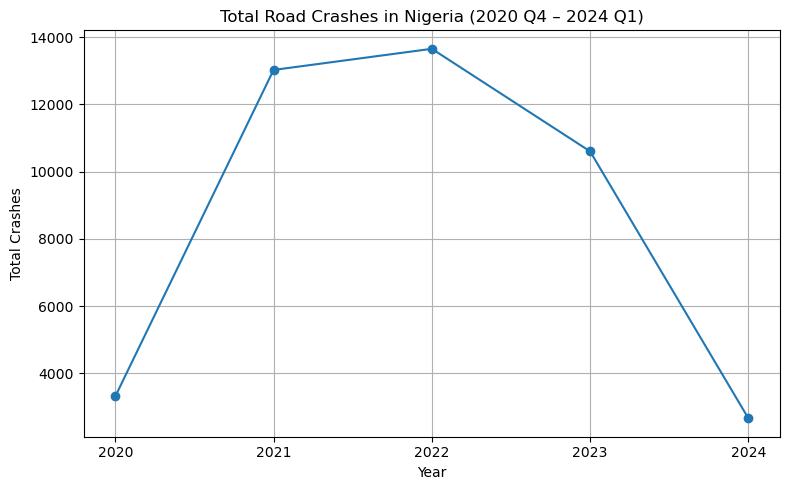

In [4]:

crashes_year = a.groupby('Year')['Total_Crashes'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.plot(
    crashes_year['Year'],
    crashes_year['Total_Crashes'],
    marker='o'
)

plt.xticks(crashes_year['Year'])
plt.xlabel('Year')
plt.ylabel('Total Crashes')
plt.title('Total Road Crashes in Nigeria (2020 Q4 – 2024 Q1)')

plt.grid(True)
plt.tight_layout()
plt.show()


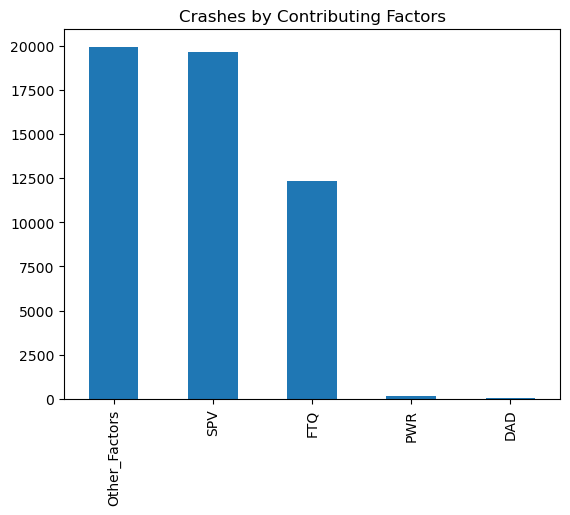

In [7]:
factor_summary = a[['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors']].sum().sort_values(ascending=False)
factor_summary.plot(kind='bar', title="Crashes by Contributing Factors")
plt.show()